# Train and Evaluate Deep Neural Network with PyTorch

In [2]:
import pandas as pd

# load the training dataset (excluding rows with null values)
penguins = pd.read_csv('data/penguins.csv').dropna()

# Deep Learning models work best when features are on similar scales
# In a real solution, we'd implement some custom normalization for each feature, but to keep things simple
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size
for i in range(1,3):
    penguins = penguins.append(penguins)

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

C:\Users\restu\AppData\Local\Temp\ipykernel_10660\1646010116.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)
C:\Users\restu\AppData\Local\Temp\ipykernel_10660\1646010116.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  penguins = penguins.append(penguins)


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
278,51.3,19.2,19.3,36.5,2
311,47.5,16.8,19.9,39.0,2
41,40.8,18.4,19.5,39.0,0
163,49.0,16.1,21.6,55.5,1
103,37.8,20.0,19.0,42.5,0
97,40.3,18.5,19.6,43.5,0
323,49.0,19.6,21.2,43.0,2
307,54.2,20.8,20.1,43.0,2
38,37.6,19.3,18.1,33.0,0
192,42.7,13.7,20.8,39.5,1


In [3]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 50.2 18.8 20.2 38.0 2 ] Chinstrap
[ 48.7 15.1 22.2 53.5 1 ] Gentoo
[ 41.8 19.4 19.8 44.5 0 ] Adelie
[ 45.5 15.0 22.0 50.0 1 ] Gentoo
[ 50.7 19.7 20.3 40.5 2 ] Chinstrap
[ 39.7 17.9 19.3 42.5 0 ] Adelie
[ 38.3 19.2 18.9 39.5 0 ] Adelie
[ 52.0 18.1 20.1 40.5 2 ] Chinstrap
[ 35.0 17.9 19.2 37.25 0 ] Adelie
[ 49.0 19.6 21.2 43.0 2 ] Chinstrap


In [4]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
label = 'Species'

x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                   penguins[label].values,
                                                   test_size=0.30,
                                                   random_state=0)

print('Training Set: %d, Test Set: %d\n' % (len(x_train), len(x_test)))
print('Sample of features and labels')

for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')

Training Set: 957, Test Set: 411

Sample of features and labels
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


In [5]:
!pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


### Installing and Import PyTorch

In [6]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Memilih secara acak untuk menentukan peluang
torch.manual_seed(0)

print('Libraries imported - ready to use PyTorch', torch.__version__)

Libraries imported - ready to use PyTorch 1.9.0+cpu


### Data Understanding for PyTorch

In [7]:
# Membuat dataset untuk data latih dan label
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Membuat dataset untuk di data vaslidasi dan label
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x, test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


### Data Modeling Neural Network

In [8]:
# Mencari jumlah node lapisan yang tersembunyi
h1 = 10

# Mendefinisikan algoritma neural network
class PenguinNet(nn.Module):
    def __init__(self):
        super(PenguinNet, self).__init__()
        self.fc1 = nn.Linear(len(features), h1)
        self.fc2 = nn.Linear(h1, h1)
        self.fc3 = nn.Linear(h1, len(penguin_classes))
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Membuat model jaringan instance
model = PenguinNet()
print(model)

PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


### Data Training Model Naural Network

In [9]:
def train(model, data_loader, optimizer):
    # Mengatur model kemodel pelatihan
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        
        # Maju kedepan
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # Kembali ke propagasi
        loss.backward()
        optimizer.step()

    # Mengembalikan rata-rata kerugian
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Mengalihkan model ke mode evaluasi
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            
            # Mendapatkan nilai prediksi
            out = model(data)

            # Kalkulasi nilai kerugian
            test_loss += loss_criteria(out, target).item()

            # Kalkulasi nilai akurat
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Menghitung rata-rata nilai kerugian dan nilai akurat berasarkan total waktu
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # Mengembalikan nilai kerugian berdasarkan waktu
    return avg_loss

# Menentukan kriteria kerugian
loss_criteria = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# Melacak metrik menggunakan array
epoch_nums = []
training_loss = []
validation_loss = []

# Melatih 50 waktu
epochs = 50
for epoch in range(1, epochs + 1):

    # Mencetak angka waktu
    print('Epoch: {}'.format(epoch))
    
    # Mengoptimalkan bobot
    train_loss = train(model, train_loader, optimizer)
    
    # Memeriksa kinerja model
    test_loss = test(model, test_loader)
    
    # Cetak metrik untuk waktu sekarang
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: 1.118814
Validation set: Average loss: 1.023595, Accuracy: 148/411 (36%)

Epoch: 2
Training set: Average loss: 1.010274
Validation set: Average loss: 0.983460, Accuracy: 163/411 (40%)

Epoch: 3
Training set: Average loss: 0.965314
Validation set: Average loss: 0.934165, Accuracy: 191/411 (46%)

Epoch: 4
Training set: Average loss: 0.911513
Validation set: Average loss: 0.867269, Accuracy: 250/411 (61%)

Epoch: 5
Training set: Average loss: 0.817720
Validation set: Average loss: 0.742112, Accuracy: 272/411 (66%)

Epoch: 6
Training set: Average loss: 0.733329
Validation set: Average loss: 0.691639, Accuracy: 302/411 (73%)

Epoch: 7
Training set: Average loss: 0.696301
Validation set: Average loss: 0.661350, Accuracy: 312/411 (76%)

Epoch: 8
Training set: Average loss: 0.671731
Validation set: Average loss: 0.640087, Accuracy: 327/411 (80%)

Epoch: 9
Training set: Average loss: 0.653092
Validation set: Average loss: 0.624311, Accuracy: 338/411 (82%)

E

### Review Training and Velidation Losses

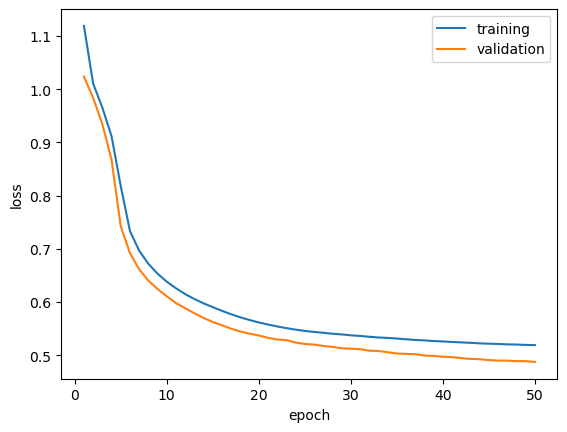

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Wight and Bias Learned

In [11]:
for param_tensor in model.state_dict():
    print(param_tensor, '\n', model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.00374341  0.2682218  -0.41152257 -0.3679695 ]
 [-0.17916065 -0.08960588  0.11843111  0.5180273 ]
 [-0.04437202  0.13230628 -0.15110654 -0.09828269]
 [-0.47767425 -0.33114105 -0.20611155  0.01852179]
 [ 0.22086564  0.57115096 -0.4008633  -0.1869742 ]
 [ 0.31580445  0.247769   -0.20200182  0.398905  ]
 [-0.08059168  0.05290705  0.4527381  -0.46383518]
 [-0.3545517  -0.15797205 -0.23337851  0.39141223]
 [-0.32408983 -0.23016644 -0.34932023 -0.4682805 ]
 [-0.4734976   0.80028427  0.3018039   0.15444127]]
fc1.bias 
 [ 0.02629578 -0.20744476  0.08459234 -0.46684736 -0.355858   -0.45410085
  0.31546897  0.25728968 -0.22174752  0.24439499]
fc2.weight 
 [[ 0.20224687  0.3143725   0.12550515  0.04272011  0.21202639 -0.18619564
   0.05892715 -0.24517313 -0.21917307 -0.16335806]
 [ 0.14308453  0.08098815 -0.18731831  0.09553465  0.74755704 -0.0117083
   0.01207405  0.03671877  0.19618031  0.71772873]
 [-0.24369258 -0.09592997  0.12428063  0.2620103   0.4403401   0.3276189
   0.06

### Evaluate Model Performance

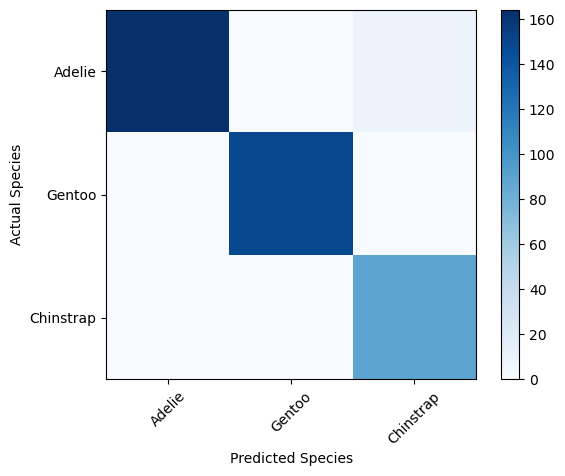

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np

model.eval()

x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)

cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

### Save model training

In [13]:
model_file = 'models/penguin_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('model saved as', model_file)

model saved as models/penguin_classifier.pt


### Use Model Training

In [14]:
x_new = [[50.4,15.3,20,50]]
print('New Sample: {}'.format(x_new))

model = PenguinNet()
model.load_state_dict(torch.load(model_file))

model.eval()

x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)

print('Prediction:', penguin_classes[predicted.item()])

New Sample: [[50.4, 15.3, 20, 50]]
Prediction: Gentoo
